<a href="https://colab.research.google.com/github/terrafirmatrekker/WHR2022EDA/blob/main/WorldHappinessReport22EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The World Happiness Report of 2022

## **Analyzing The World Happiness Report of 2022**

2022 is the tenth anniversary of the World Happiness Report (WHR). The WHRs are based on a wide variety of data, the most important
source has always been the Gallup World Poll, due to its unique range and relatibility to global annual surveys.

Evaluations of quality of life from the Gallup World Poll
provides the basis for the annual happiness rankings that have always spurned widespread interest about the secrets of life in the happiest countries. 

## **Methodology**

The Gallup World poll used asks respondents to evaluate their
current life as a whole using the mental image of a ladder, with **the best possible life for them as a 10 and worst possible as a 0.** Each respondent provides a numerical responseon this scale, referred to as the Cantril ladder. 

Typically, around 1,000 responses are gathered annually for each country. Weights are used to construct population-representative national averages for each year in each country. Gallup bases their national happiness rankings on a three-year average, to increase the sample size to provide more precise estimates. 

## **Data**

This report will examine the most recent [dataset](https://happiness-report.s3.amazonaws.com/2022/Appendix_2_Data_for_Figure_2.1.xls) which has been converted into a CSV and stored as a Gist [here](https://gist.github.com/terrafirmatrekker/474f3acc5b44322bc54fcc49870dcfd1).

# Loading and Cleaning Data

In [179]:
# Importing Some of the Initial Libraries Needed
import pandas as pd
import numpy as np
from urllib.request import urlretrieve

In [180]:
url = 'https://gist.githubusercontent.com/terrafirmatrekker/474f3acc5b44322bc54fcc49870dcfd1/raw/14dafbd7faf09e0b1d4a53646b830cf79b3c510b/WHR2022.csv'
urlretrieve(url, 'WHR2022.csv')
data = pd.read_csv('WHR2022.csv')
# Get a count of unique values and columns
print(data.shape)
# Get top 5 countries
data.head()

(147, 24)


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see there are 24 columns, but it seems like some of the columns are empty. 

Let's use *pandas.DataFrame.info* method to get more info about the data types.


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

The Rank is a int64, the Country is an object and the criteria are float64. It also seems as if we have 12 empty columns without values that we can remove prior to our analysis. 

Let's use *df.dropna(axis=1, how='all')* to remove these extraneous columns with NaNs and store it in a new dataframe.

In [182]:
clean_data = data.dropna(axis=1, how='all')
clean_data.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


That looks a bit better but it seems that our data has two other columns that we can drop since "Whisker-high" & "Whisker-low" refers to a box plot that was generated from the orginal dataset and is not necessary for analysis so let's drop these columns with *DataFrame.drop*.

In [183]:
clean_data = clean_data.drop(labels=['Whisker-high', 'Whisker-low'], axis = 1)
clean_data.head()

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [184]:
# Take a look at the entire dataset for anything missing
display(clean_data)

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,3.268,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,1.263,0.758,0.000,0.289,0.000,0.089,0.005


Let's get rid of the last row that has NaNs for values. using iloc to select a portion of the dataframe using position based indexing. 

We can use this attribute to select all the rows except the last one and then assign back the selected rows to the original variable. 

In [185]:
clean_data = clean_data.iloc[:-1 , :]
display(clean_data)

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.471,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,0.216,1.392,0.498,0.631,0.103,0.082,0.034


In [186]:
# Checking to see if there are any missing values
clean_data.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

# Exploring the Data

Now that we have cleaned the data for our analysis. Let's first use *pandas.DataFrame.describe* to get a quick snapshot of some descriptive statistics. 

In [187]:
clean_data.describe()

,RANK,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000




---


This method helps us get an idea of the central tendency, dispersion and general shape of the dataset’s distribution. 

We can see that the:

*  **Mean Happiness Score is 5.553575**
*  **Min and Max are 2.4 and 7.8 respectively**. 

Let's create a few functions to highlight  the maximum values and minimum values of each attribute in the data set.


---



In [ ]:
# Highlight the Maximum values

def highlight_max(t):    
    is_max = t == t.max()
    return ['background-color: green' if v else '' for v in is_max]

clean_data.style.apply(highlight_max)

In [ ]:
# Highlight the Minimum Values

def highlight_min(b):
  is_min = b == b.min()
  return ['background-color: coral' if v else '' for v in is_min]

clean_data.style.apply(highlight_min)

## Looking at Distribution

 Let's import some more libraries to examine the distribution of values in a specific column. Let's display the distribution with a histogram.

In [207]:
# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


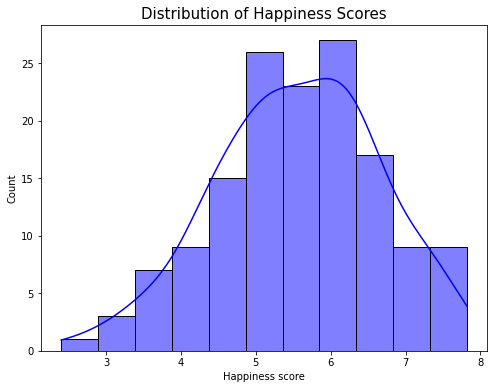

In [208]:
# Setting the size of the historgram and running sns.histplot()
plt.figure(figsize=(8,6))
sns.histplot(clean_data['Happiness score'], kde = True, color ='blue')
plt.title('Distribution of Happiness Scores', fontsize=15);

## The Top 5 and Bottom 5 Countries

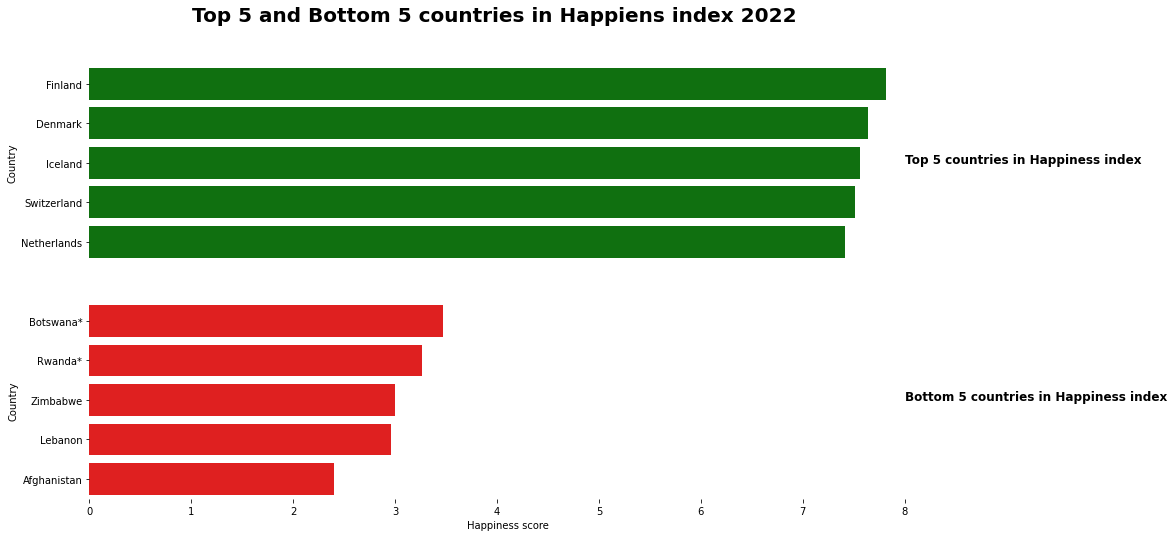

In [209]:
# Top 5 and bottom 5 countries in 2022 report
fig= plt.figure(figsize=(15,8))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 5 and Bottom 5 countries in Happiens index 2022", family='Sans-Serif', weight='bold', size=20)
ax1=plt.subplot(g[0,0])

top_5=clean_data.head(5)
bot_5= clean_data.tail(5)
ax1=sns.barplot(data=top_5, x=top_5['Happiness score'],y=top_5['Country'], color='green')
#ax1.set_xlabel('')
ax1.xaxis.set_visible(False)
ax1.annotate("Top 5 countries in Happiness index",xy=(8,2), family='Sans-Serif', weight='bold', size=12)
ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=bot_5, x=bot_5['Happiness score'],y=bot_5['Country'], color='red')
ax2.annotate("Bottom 5 countries in Happiness index",xy=(8,2), family='Sans-Serif', weight='bold', size=12)
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

## Correlation 

Let's examine the relationships between the different variables by checking the correlation between them. One of the ways to quickly check the correlations between variables is by utilizing df.corr(), which returns a table of all correlations. To get a clearer view of correlations let's use a heatmap.

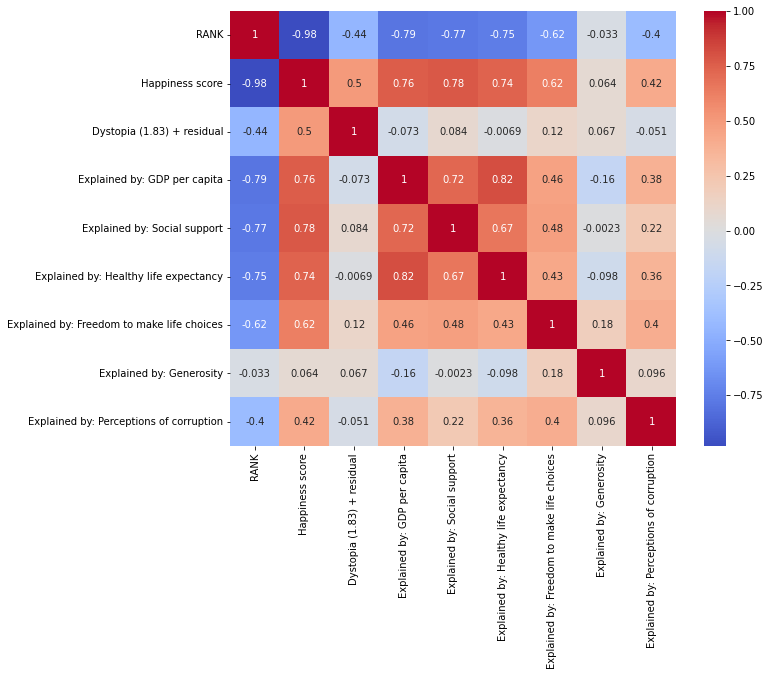

In [210]:
# Set the size of the plot
plt.figure(figsize=(10,8))

# Create a heatmap of correlations
sns.heatmap(clean_data.corr(), cmap='coolwarm', annot=True);


### Correlation Takeaways

1.   **Social support** has the highest correlation to the assigned happiness score
2.   **Perceptions of corruption** has the lowet correlation to the assigned happiness score
3.   **Countries with higher GDP** have higher healthy life expectancy and social support systems





## Examining Correlation With Scatter Plots

Let's complement our heatmap with a few scatter plots that examine Score against the 3 top correlating factors. 



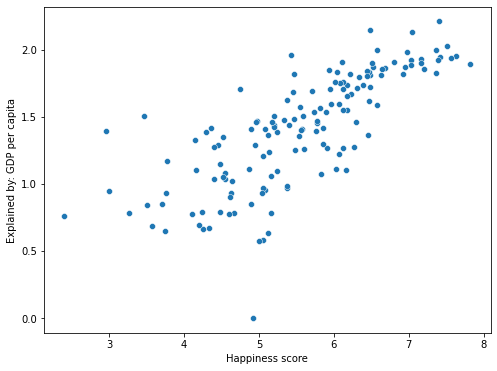

In [224]:
# Scatter plot looking at Happiness Score & GDP per capita
plt.figure(figsize=(8,6))
sns.scatterplot(x=clean_data['Happiness score'],y=clean_data['Explained by: GDP per capita'])
plt.show()

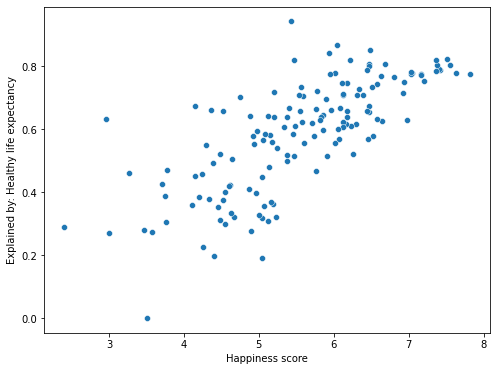

In [228]:
# Scatter plot looking at Happiness Score & Healthy Life Expectancy
plt.figure(figsize=(8,6))
sns.scatterplot(x=clean_data['Happiness score'],y=clean_data['Explained by: Healthy life expectancy'])
plt.show()

<Figure size 576x432 with 0 Axes>

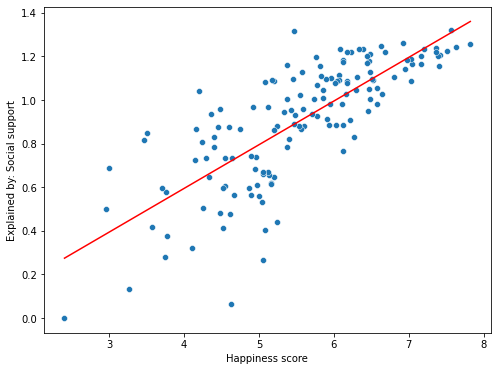

In [232]:
# Scatter plot looking at Happiness Score & Social Support with regression
plt.figure(figsize=(8,6))
x=clean_data['Happiness score']
y=clean_data['Explained by: Social support']
parameter = np.polyfit(x,y,1) 
y2 = parameter[0] * x + parameter[1] 
plt.figure(figsize=(8,6))
sns.scatterplot(x=x,y=y)
plt.plot(x, y2, color='red') 
plt.show()

## A Geographic Visualization of Happiness Scores

In [233]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = clean_data['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = clean_data['Happiness score'], 
           text = clean_data['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'mercator'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

## A Tale of Two Countries

As we creep further into the 2020s geopolitical tensions and experiences post-COVID must have an accute impact on our perceptions of happiness. For this next section I would like to examine countries against each other. 

### China vs. Taiwan


In [236]:
chi_vs_tai = clean_data[clean_data['Country'].isin(["China","Taiwan Province of China"])]
chi_vs_tai

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
25,26,Taiwan Province of China,6.512,2.002,1.897,1.095,0.733,0.542,0.075,0.168
71,72,China,5.585,1.516,1.508,0.958,0.705,0.656,0.099,0.142


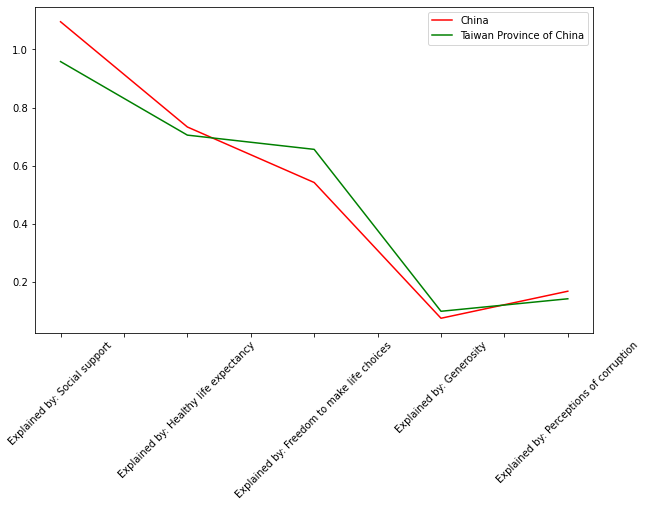

In [237]:
chi_vs_tai.iloc[0,5:].plot(color = 'r', figsize = (10,6))
chi_vs_tai.iloc[1,5:].plot(color = 'g', figsize = (10,6))
plt.xticks(rotation=45)
labels=['China','Taiwan Province of China']
plt.legend(labels)
plt.show()

### Russia vs. Ukraine

In [238]:
rus_vs_ukr = clean_data[clean_data['Country'].isin(["Russia","Ukraine"])]
rus_vs_ukr

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
79,80,Russia,5.459,1.494,1.685,1.095,0.586,0.401,0.117,0.080
97,98,Ukraine,5.084,1.331,1.411,1.081,0.583,0.473,0.188,0.017


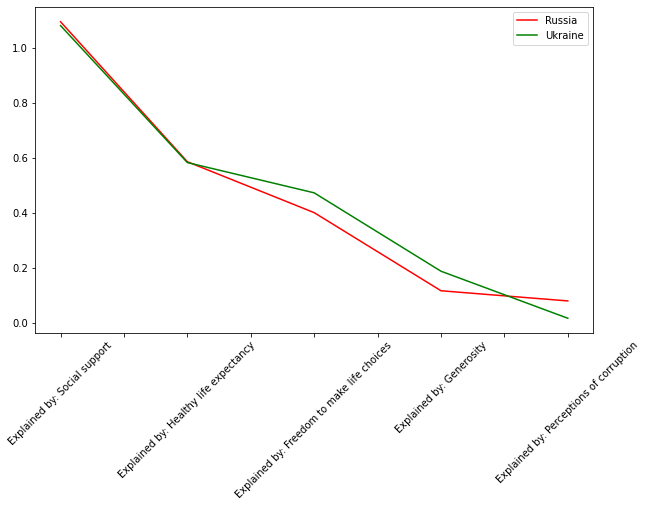

In [240]:
rus_vs_ukr.iloc[0,5:].plot(color = 'r', figsize = (10,6))
rus_vs_ukr.iloc[1,5:].plot(color = 'g', figsize = (10,6))
plt.xticks(rotation=45)
labels=['Russia','Ukraine']
plt.legend(labels)
plt.show()

## Conclusion

One could spend hours examining this dataset and finding patterns. In the future I would like to load the countries [gini coeffcient](https://en.wikipedia.org/wiki/Gini_coefficient) data to compare it against the happiness scores.

I think what is most suprising is that in comparison to previous years Social Support has rose to be the number one factor in correlation to happiness score. One can believe that during the peak of Covid factors like social support mattered more to survey respondents than the typical GDP per a capita.

### Special Thanks

I would like to thank Code Louisville and my mentors and classmates for a fruitful session. I really enjoyed learning more about data analysis via Python and know that I have merely scratched the surface in terms of what is possible. 